## 1.Function transformer (log, reciprocal, sq, sqrt, custom etc)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import scipy.stats as stats
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer


df=pd.read_csv('titanic.txt')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
ti=df[['Age','Fare','Survived']]
ti.head(4)

,Age,Fare,Survived
0,22.0,7.2500,0
1,38.0,71.2833,1
2,26.0,7.9250,1
3,35.0,53.1000,1


In [3]:
ti.isnull().sum()

Age         177
Fare          0
Survived      0
dtype: int64

In [4]:
ti['Age'].fillna(df['Age']. mean(), inplace=True)

C:\Users\darsh\AppData\Local\Temp\ipykernel_648\1213249332.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ti['Age'].fillna(df['Age']. mean(), inplace=True)


In [5]:
ti.isnull().sum()

Age         0
Fare        0
Survived    0
dtype: int64

In [6]:
x=ti.iloc[:,0:2]
y=ti.iloc[:,2]

In [7]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=42)

C:\Users\darsh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


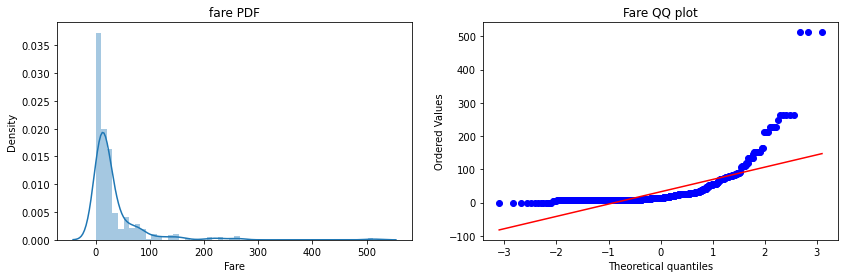

In [8]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(xtrain['Fare'])
plt.title('fare PDF')

plt.subplot(122)
stats.probplot(xtrain['Fare'],dist="norm",plot=plt)
plt.title('Fare QQ plot')

plt.show()

C:\Users\darsh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


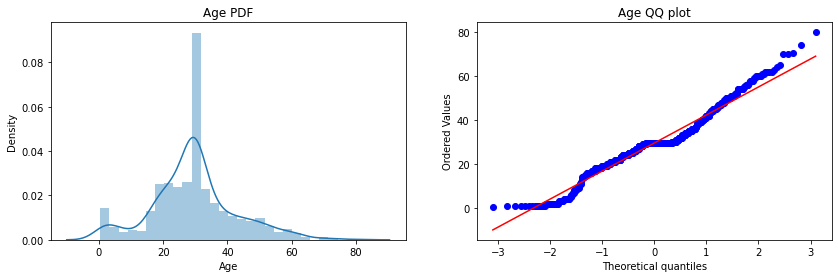

In [9]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(xtrain['Age'])
plt.title('Age PDF')

plt.subplot(122)
stats.probplot(xtrain['Age'],dist="norm",plot=plt)
plt.title('Age QQ plot')

plt.show()

In [10]:
cl=LogisticRegression()
cl2=DecisionTreeClassifier()

In [11]:
cl.fit(xtrain,ytrain)
cl2.fit(xtrain,ytrain)

ypred=cl.predict(xtest)
ypred1=cl2.predict(xtest)

print("accuracy LR", accuracy_score(ytest,ypred))
print("accuracy DT", accuracy_score(ytest,ypred1))

accuracy LR 0.6480446927374302
accuracy DT 0.6871508379888268


#### Now will check the accuracy and the graphs after applying log tranformation using function transform

In [12]:
trf=FunctionTransformer(func=np.log1p)

In [13]:
xtrain_transformed=trf.fit_transform(xtrain)
xtest_transformed=trf.fit_transform(xtest)

In [14]:
cl=LogisticRegression()
cl2=DecisionTreeClassifier()

cl.fit(xtrain_transformed,ytrain)
cl2.fit(xtrain_transformed,ytrain)

ypred=cl.predict(xtest_transformed)
ypred1=cl2.predict(xtest_transformed)

print("accuracy LR", accuracy_score(ytest,ypred))
print("accuracy DT", accuracy_score(ytest,ypred1))

accuracy LR 0.6815642458100558
accuracy DT 0.6815642458100558


In [15]:
#cross validation

xtransformed=trf.fit_transform(x)

print("LR", np.mean(cross_val_score(cl,xtransformed,y,scoring='accuracy',cv=10)))
print("DT", np.mean(cross_val_score(cl2,xtransformed,y,scoring='accuracy',cv=10)))




LR 0.678027465667915
DT 0.6610611735330836


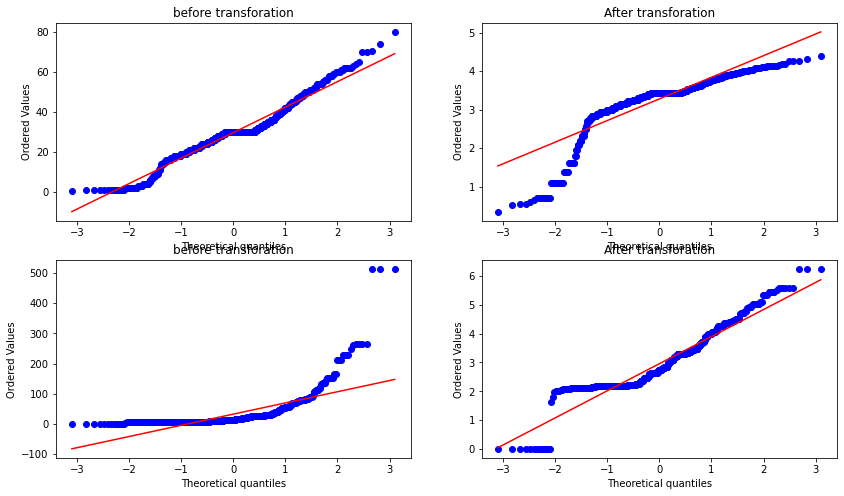

In [16]:
plt.figure(figsize=(14,8))
plt.subplot(2,2,1)
stats.probplot(xtrain['Age'],dist="norm",plot=plt)
plt.title('before transforation')

plt.subplot(2,2,2)
stats.probplot(xtrain_transformed['Age'],dist="norm",plot=plt)
plt.title('After transforation')

plt.subplot(2,2,3)
stats.probplot(xtrain['Fare'],dist="norm",plot=plt)
plt.title('before transforation')

plt.subplot(2,2,4)
stats.probplot(xtrain_transformed['Fare'],dist="norm",plot=plt)
plt.title('After transforation')

plt.show()

### other tranforms using funtion transformer (reciprocal, sqare, sqrt ....)

In [17]:
ot=df[['Survived','Age','Parch']]

In [18]:
ot['Age'].fillna(df['Age'].mean(),inplace=True)
ot.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Age       891 non-null    float64
 2   Parch     891 non-null    int64  
dtypes: float64(1), int64(2)
memory usage: 21.0 KB


C:\Users\darsh\AppData\Local\Temp\ipykernel_648\1412275600.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ot['Age'].fillna(df['Age'].mean(),inplace=True)


In [19]:
def apply_transformation(transform):
    x=ot.iloc[:,1:3]
    y=ot.iloc[:,0]
    
    trf=ColumnTransformer([('log', FunctionTransformer(transform),['Age'])],remainder='passthrough')
    
    xtrans=trf.fit_transform(x)
    
    LR=LogisticRegression()
    
    print("accuracy",np.mean(cross_val_score(LR,xtrans,y,scoring='accuracy',cv=5)))
    
    plt.figure(figsize=(14,4))
    
    plt.subplot(121)
    stats.probplot(x['Age'],dist='norm',plot=plt)
    plt.title('before transormation')
    
    plt.subplot(122)
    stats.probplot(xtrans[:,0],dist='norm',plot=plt)
    plt.title('after transormation')
    
    plt.show()

accuracy 0.6206578369217249


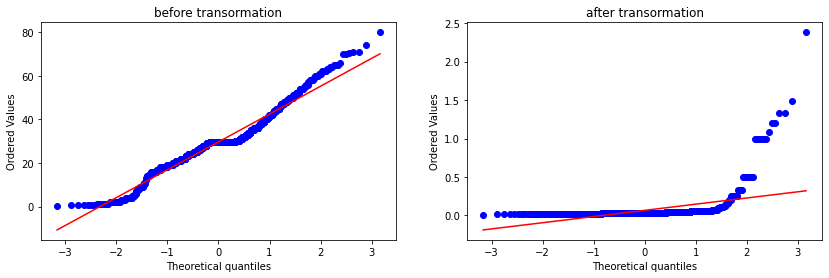

In [20]:
apply_transformation(lambda x: 1/x)

## 2.Power Transformer (boxcox and yeo johnson transform)

In [21]:
con=pd.read_csv('https://raw.githubusercontent.com/campusx-official/100-days-of-machine-learning/main/day31-power-transformer/concrete_data.csv')
con.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [58]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import PowerTransformer

import scipy.stats as stats


In [23]:
dp=pd.read_csv('https://raw.githubusercontent.com/campusx-official/100-days-of-machine-learning/main/day31-power-transformer/concrete_data.csv')

In [24]:
dp.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [25]:
dp.isnull().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

In [26]:
# we need to check weather the data contains zerr valuses and negetive values bcz bcz can not be applied if these values exists in data
dp.describe()


,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [27]:
x=dp.drop(columns=['Strength'])
y=dp.iloc[:,-1]

xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=42)

LR=LinearRegression()

LR.fit(xtrain,ytrain)

ypred=LR.predict(xtest)

r2_score(ytest,ypred)

0.627553179231485

In [31]:
# checking cross val score
np.mean(cross_val_score(LR,x,y,scoring='r2'))

0.4609940491662866

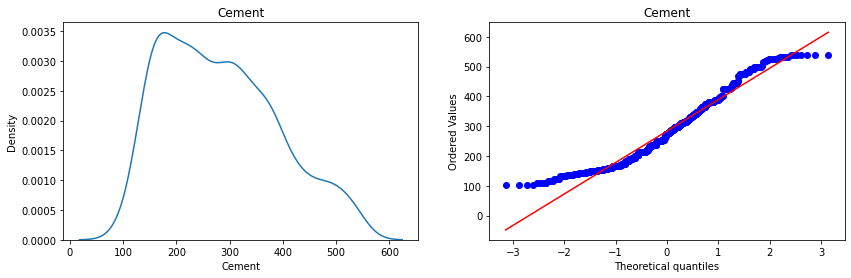

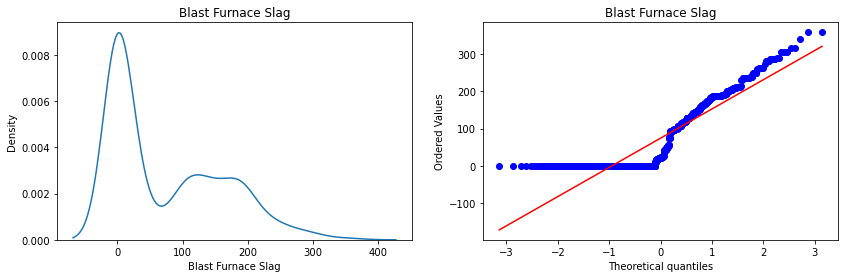

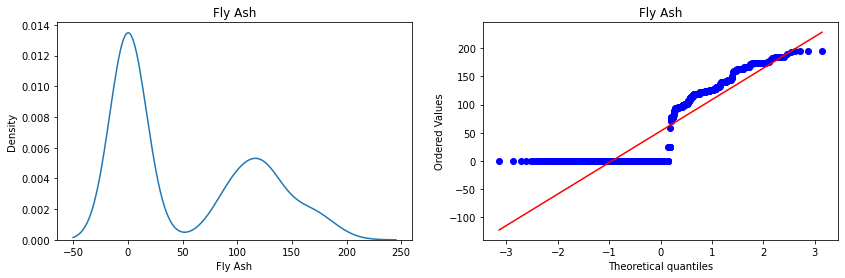

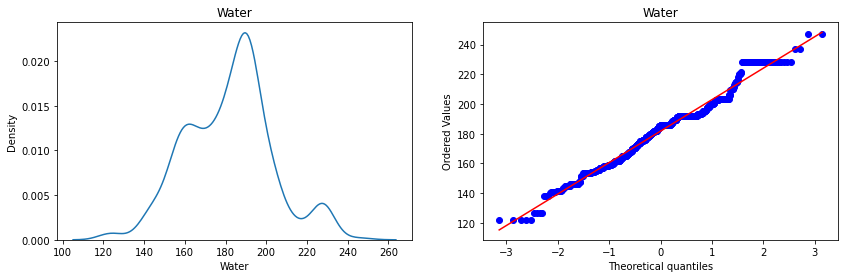

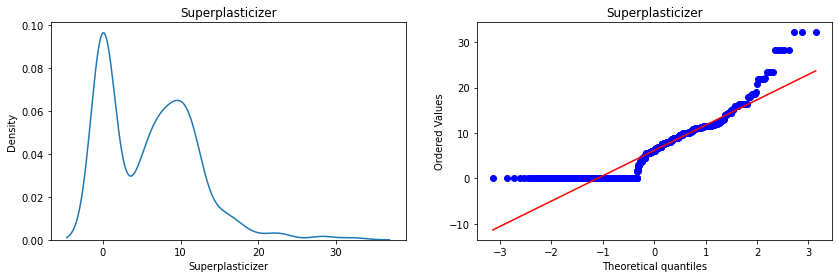

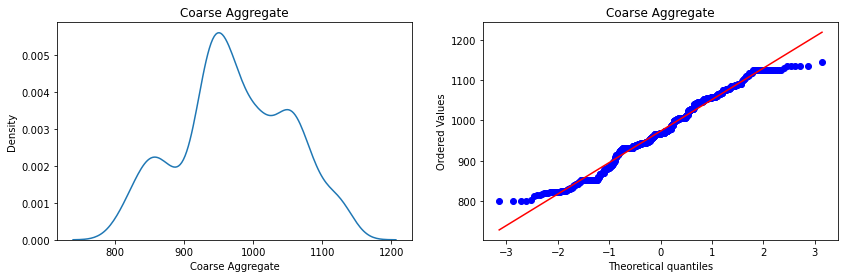

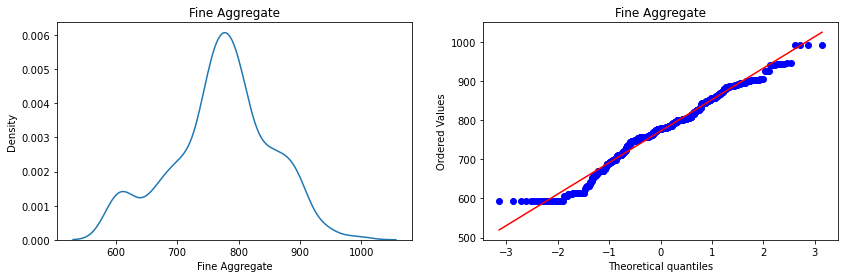

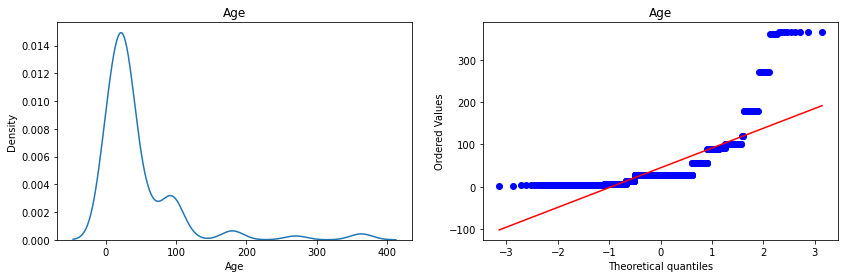

In [37]:
# ploting distplots for all without any transformation

for col in xtrain.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.kdeplot(xtrain[col])
    plt.title(col)
    
    plt.subplot(122)
    stats.probplot(xtrain[col],dist="norm",plot=plt)
    plt.title(col)
    
    plt.show()

### Box-Cox transformation

In [43]:
bc=PowerTransformer(method="box-cox")

xtrain_transformed=bc.fit_transform(xtrain+0.000001)
xtest_transformed=bc.fit_transform(xtest+0.000001)

pd.DataFrame({'col':xtrain.columns,'box_cox_lambdas':bc.lambdas_})

,col,box_cox_lambdas
0,Cement,0.215602
1,Blast Furnace Slag,0.025996
2,Fly Ash,-0.006544
3,Water,0.959062
4,Superplasticizer,0.103365
5,Coarse Aggregate,1.192492
6,Fine Aggregate,1.973781
7,Age,-0.014692


In [45]:
LR.fit(xtrain_transformed,ytrain)

y2_pred=LR.predict(xtest_transformed)
r2_score(ytest,y2_pred)

0.8055321005305189

In [49]:
np.mean(cross_val_score(LR,xtrain_transformed,ytrain,scoring='r2'))

0.7923976624173532

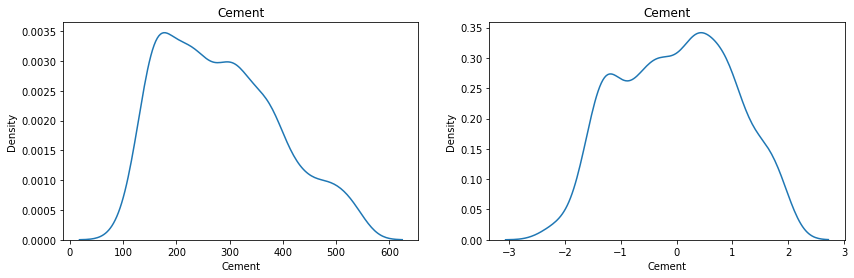

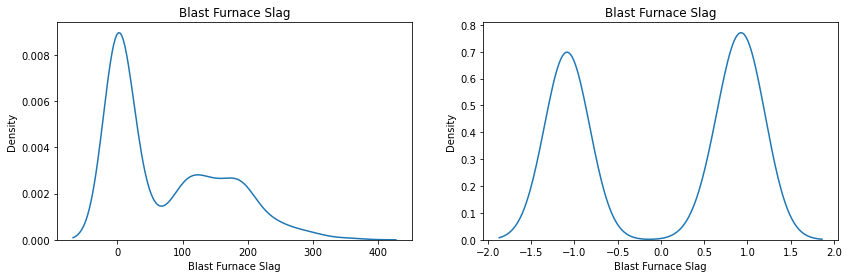

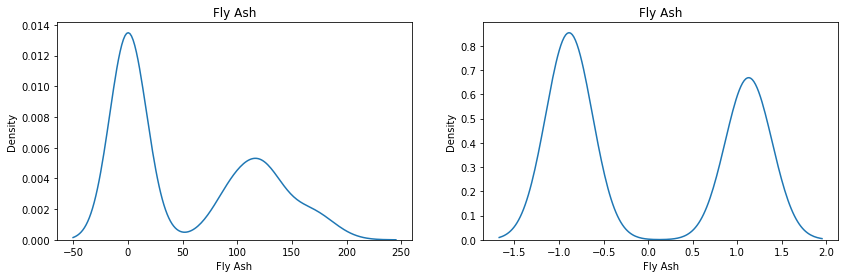

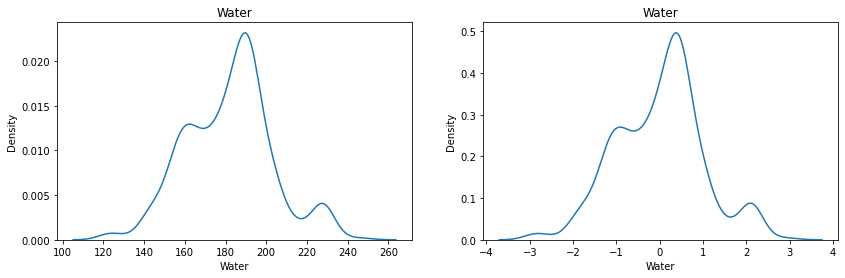

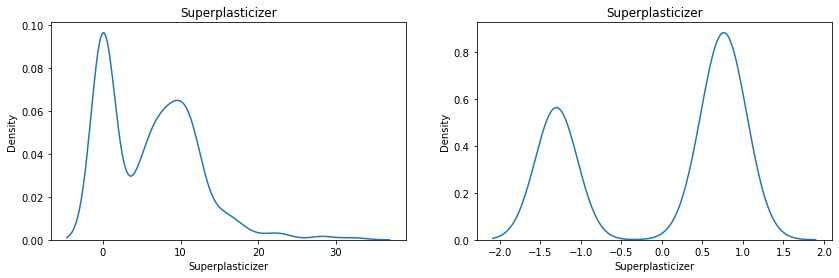

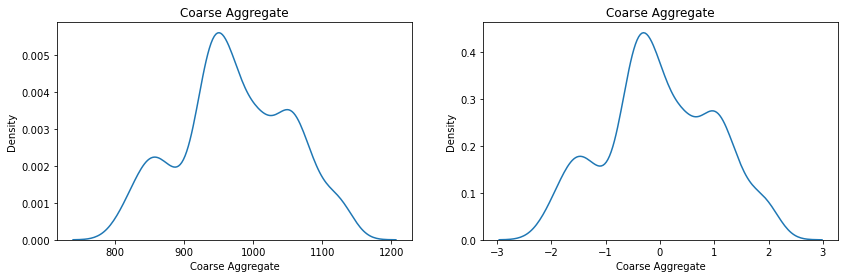

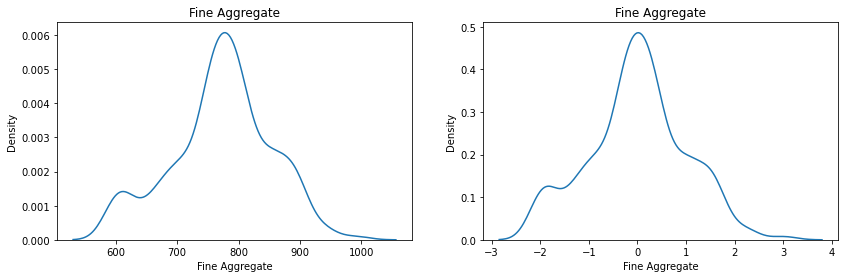

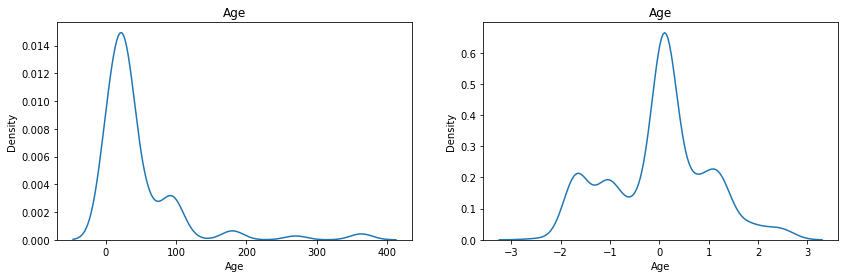

In [51]:
#before and after comparision of boxcox
# we need to convert the transfored data into dataframe
xtrain_trans=pd.DataFrame(xtrain_transformed,columns=xtrain.columns)

for col in xtrain.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.kdeplot(xtrain[col])
    plt.title(col)
    
    plt.subplot(122)
    sns.kdeplot(xtrain_trans[col])
    plt.title(col)
    
    plt.show()

##  yeo-Johonson

In [59]:
yj=PowerTransformer()
# by default the method is yeo-johnson

xttrain=yj.fit_transform(xtrain)
xttest=yj.fit_transform(xtest)

LR.fit(xttrain,ytrain)
ypred=LR.predict(xttest)
r2_score(ytest,ypred)

0.8153845515001846

In [61]:
np.mean(cross_val_score(LR,xttrain,ytrain,scoring='r2'))

0.7941782182448474

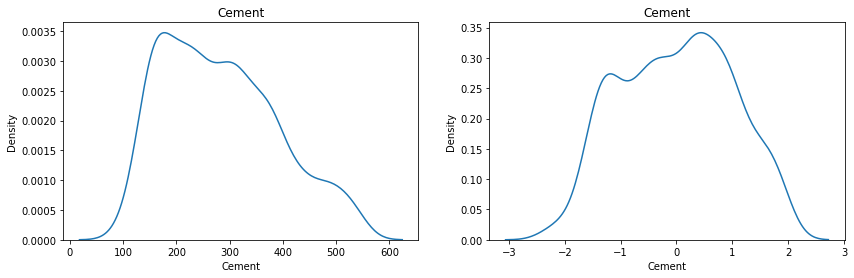

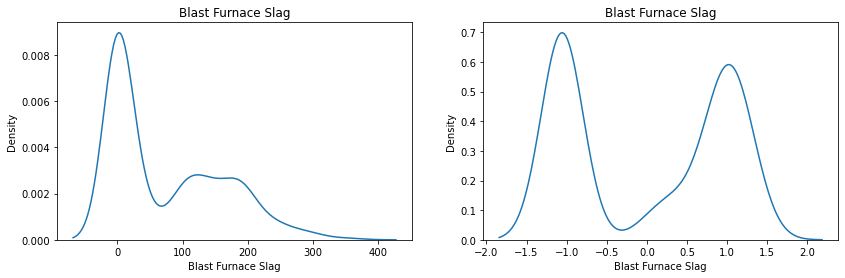

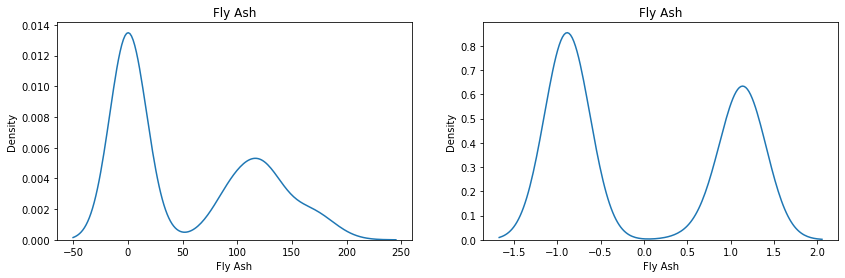

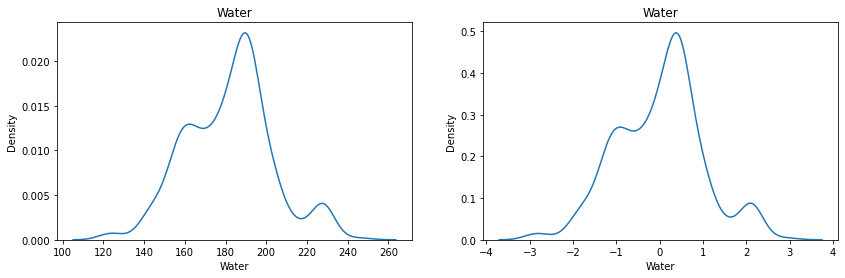

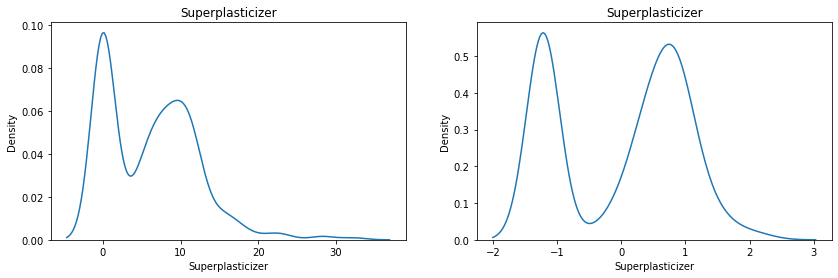

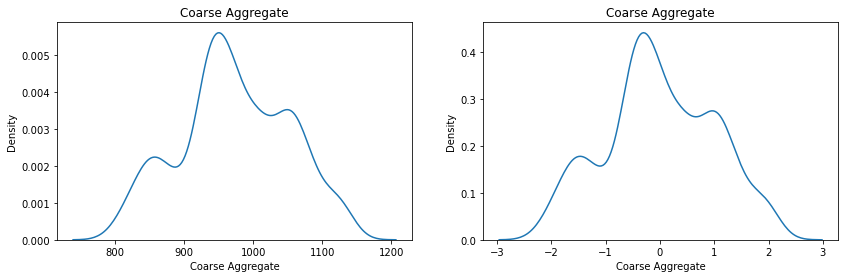

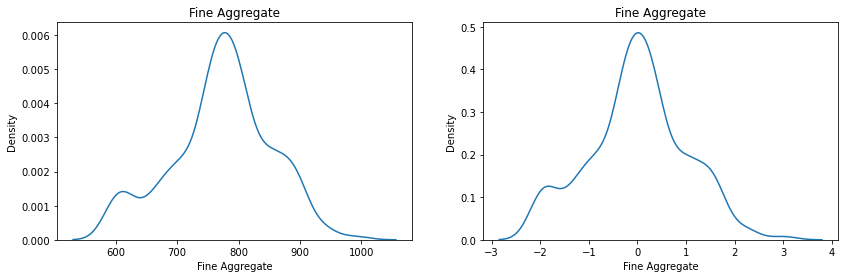

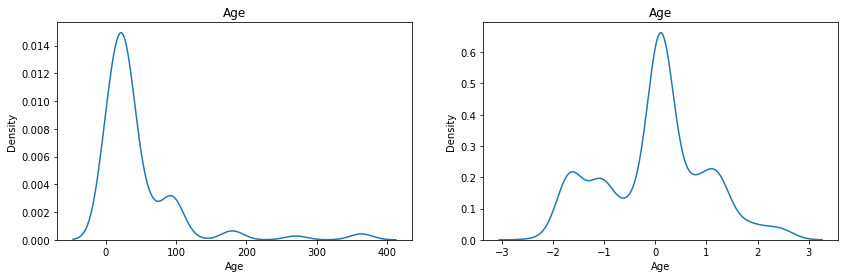

In [62]:
#before and after comparision of boxcox
# we need to convert the transfored data into dataframe
xtrain_transf=pd.DataFrame(xttrain,columns=xtrain.columns)

for col in xtrain.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.kdeplot(xtrain[col])
    plt.title(col)
    
    plt.subplot(122)
    sns.kdeplot(xtrain_transf[col])
    plt.title(col)
    
    plt.show()